In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
url = "https://maritimecybersecurity.nl/public/allItems"
response = requests.get(url)
data = response.json() 

extracted_data = []
for item in data:
    extracted_data.append({
        "viccountry": item.get("viccountry"),
        "title": item.get("title"),
        "type": item.get("type"),
        "area": item.get("area"),
        "inccountry": item.get("inccountry"),
        "attackcountry": item.get("attackcountry"),
        "referenceNumber": item.get("referenceNumber"),
        "identity": item.get("identity"),
        "year": item.get("year")
})

df = pd.DataFrame(extracted_data)

df

,viccountry,title,type,area,inccountry,attackcountry,referenceNumber,identity,year
0,Australia,DP World Australia hit by cyber attack causing...,Terminal Operator,Shore,Australia,None,20231101,DP World Australia,2023
1,Japan,"Port of Nagoya, Japan hit by Ransomware Attack...",Port,Shore,Japan,Russia,20230701,"Port of Nagoya, Japan",2023
2,USA,Cybersecurity incident at Brunswick Corporatio...,Ship Builder,Shore,USA,None,20230603,The Brunswick Corporation,2023
3,Netherlands,DDoS attack took down the North Sea Port websi...,Port,Shore,"Netherlands, Belgium",Russia,20230602,North Sea Port,2023
4,Netherlands,Pro-Russian Hackers Target Websites of Rotterd...,Port,"Shore, Offshore",Netherlands,Russia,20230601,"Ports of Rotterdam, Amsterdam, Den Helder and ...",2023
...,...,...,...,...,...,...,...,...,...
149,"Japan, South Korea",Hyundai Merchant Marine hit by backdoor entry ...,Shipping Company,Shore,South Korea,North Korea,20100401,Hyundai Merchant Marine,2010
150,"South Korea, Brazil",Drilling rig on its way from South Korea to Br...,Offshore Oil Drilling Rig,Offshore,Somalia,Somalia,20100001,Drilling rig on its way from the construction ...,2010
151,USA,Oil platforms Pacific Energy Resources hit by ...,Oil Terminal,Offshore,USA,USA,20080501,Oil platforms Pacific Energy Resources,2008
152,Venezuela,Port facility in Venezuela hit by a hacking at...,Port,Shore,Venezuela,Venezuela,20021201,Programmable Logic Controllers (PLCs) in a por...,2002


In [3]:
# Use data after 2010
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df = df[df['year'] >= 2010]

In [4]:
# Counting each category 
df['type'] = df['type'].str.lower().str.strip()
type_counts = df['type'].value_counts()
type_counts

/var/folders/nt/7f1y5h8s6qd2mh1ypgjkgbpw0000gn/T/ipykernel_26954/159420230.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['type'] = df['type'].str.lower().str.strip()


vessel                                            34
shipping company                                  32
port                                              24
ship building company                              8
navy, vessel                                       8
other government                                   5
ship builder                                       3
navy                                               2
shipping broker                                    2
marine and engineering consulting firm             2
terminal operator                                  2
offshore oil drilling rig                          2
shipping company, vessel                           1
supply chain company                               1
                                                   1
shipping crew recruitment agency                   1
marine salvage company                             1
defence engineering contractor                     1
mineral exploration company                   

In [5]:
# Define the new category mapping based on need
new_cats_mapping = {
    'vessel': 'Vessel',
    'shipping company': 'Shipping Company',
    'port': 'Port and Terminal Operations',
    'navy': 'Naval and Security Services',
    'coastguard': 'Naval and Security Services',
    'offshore oil drilling rig': 'Offshore Operations',
    'offshore wind farm': 'Offshore Operations',
    'offshore marine service provider': 'Offshore Operations',
    'offshore gas exploration': 'Offshore Operations',
    'oil terminal': 'Oil, Gas, and Energy',
    'oil company': 'Oil, Gas, and Energy',
    'gas and oil storage': 'Oil, Gas, and Energy',
    'national natural gas system operator': 'Oil, Gas, and Energy',
    'marine and engineering consulting firm': 'Maritime Services and Consulting',
    'marine salvage company': 'Maritime Services and Consulting',
    'maritime insurance company': 'Maritime Services and Consulting',
    'maritime technology company': 'Maritime Services and Consulting',
    'other government': 'Government, Regulation, and International Entities',
    'international maritime organisation': 'Government, Regulation, and International Entities',
    'ship building company': 'Shipbuilding and Maritime Engineering',
    'ship builder': 'Shipbuilding and Maritime Engineering',
    'defence engineering contractor': 'Shipbuilding and Maritime Engineering',
    'submarine engineering company': 'Shipbuilding and Maritime Engineering',
    # The remaining types will be classified under 'Miscellaneous and Specialized Services'
}

# Function to map the existing types to the new detailed categories
def new_cats(type_str):
    for key in new_cats_mapping:
        if key in type_str.lower():
            return new_cats_mapping[key]
    return 'Miscellaneous and Specialized Services'

# Apply the mapping to the 'type' column
df['detailed_category'] = df['type'].apply(new_cats)

/var/folders/nt/7f1y5h8s6qd2mh1ypgjkgbpw0000gn/T/ipykernel_26954/1290198094.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['detailed_category'] = df['type'].apply(new_cats)


In [6]:
df

,viccountry,title,type,area,inccountry,attackcountry,referenceNumber,identity,year,detailed_category
0,Australia,DP World Australia hit by cyber attack causing...,terminal operator,Shore,Australia,None,20231101,DP World Australia,2023,Miscellaneous and Specialized Services
1,Japan,"Port of Nagoya, Japan hit by Ransomware Attack...",port,Shore,Japan,Russia,20230701,"Port of Nagoya, Japan",2023,Port and Terminal Operations
2,USA,Cybersecurity incident at Brunswick Corporatio...,ship builder,Shore,USA,None,20230603,The Brunswick Corporation,2023,Shipbuilding and Maritime Engineering
3,Netherlands,DDoS attack took down the North Sea Port websi...,port,Shore,"Netherlands, Belgium",Russia,20230602,North Sea Port,2023,Port and Terminal Operations
4,Netherlands,Pro-Russian Hackers Target Websites of Rotterd...,port,"Shore, Offshore",Netherlands,Russia,20230601,"Ports of Rotterdam, Amsterdam, Den Helder and ...",2023,Port and Terminal Operations
...,...,...,...,...,...,...,...,...,...,...
146,"Belgium, The Netherlands",Port of Antwerp and Rotterdam hit by malware a...,port,Shore,"Belgium, The Netherlands",Belgium,20110601,Port of Antwerp and Port of Rotterdam,2011,Port and Terminal Operations
147,South Korea,GPS jamming incident in South Korea,vessel,"Shore, Vessel",South Korea,North Korea,20110301,"145 cell towers, 106 airplanes, 10 ships",2011,Vessel
148,South Korea,GPS jamming incident in South Korea,vessel,"Shore, Vessel",South Korea,North Korea,20100801,"181 cell towers, 15 airplanes, 1 battle ship",2010,Vessel
149,"Japan, South Korea",Hyundai Merchant Marine hit by backdoor entry ...,shipping company,Shore,South Korea,North Korea,20100401,Hyundai Merchant Marine,2010,Shipping Company


In [7]:
# Remove the]category from the dataset as it's not relevant to our essay analysis.
df = df[df['detailed_category'] != 'Oil, Gas, and Energy']

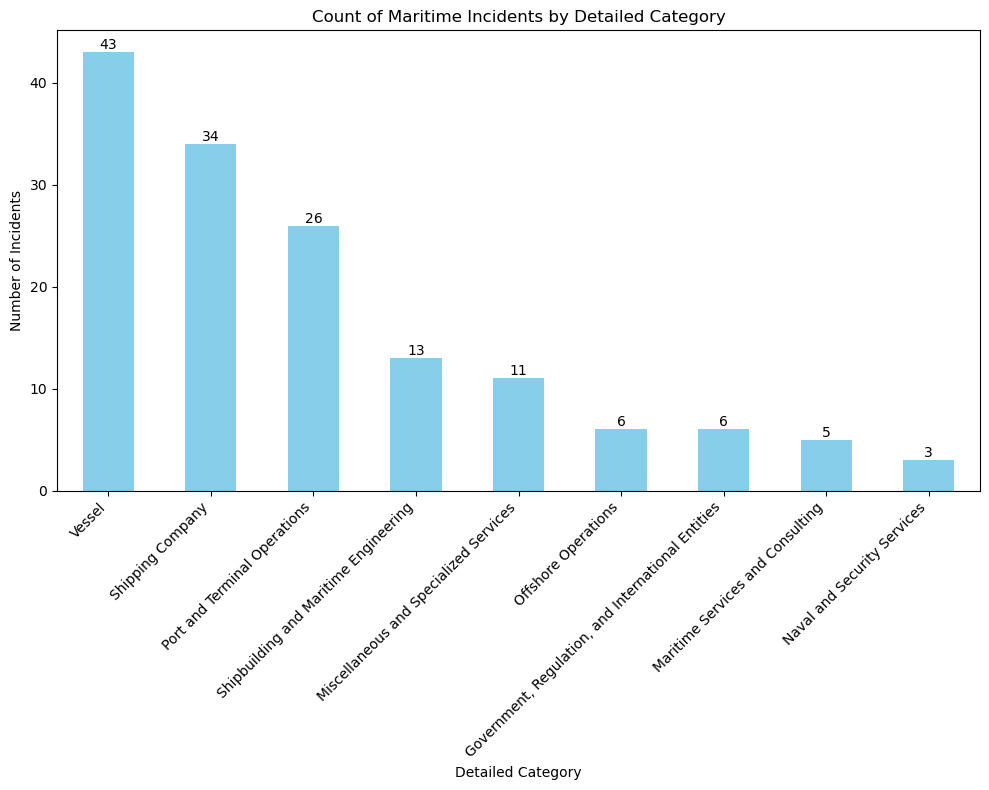

In [8]:
# Plot the new category counts as a bar chart
new_cats_counts = df['detailed_category'].value_counts()

plt.figure(figsize=(10, 8))
new_cats_counts.plot(kind='bar', color='skyblue')

plt.title('Count of Maritime Incidents by Detailed Category')
plt.xlabel('Detailed Category')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()  

for index, value in enumerate(new_cats_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

USA                27
UK                 12
South Korea        12
Russia              8
Australia           7
Japan               6
France              6
Germany             5
China               5
Norway              5
North Korea         4
Iran                4
Ukraine             4
Singapore           4
Canada              4
Belgium             3
Netherlands         3
Denmark             3
The Netherlands     3
Israel              3
Cyprus              2
Spain               2
Saudi Arabia        2
Argentina           2
Philippines         2
India               2
Greece              2
the US              1
Egypt               1
Ukarine             1
Colombia            1
Angola              1
Finland             1
UAE                 1
Ecuador             1
Sweden              1
Kuwait              1
Malta               1
Italy               1
Switzerland         1
Hong Kong           1
Macedonia           1
Malaysia            1
South Africa        1
Indonesia           1
Taiwan    

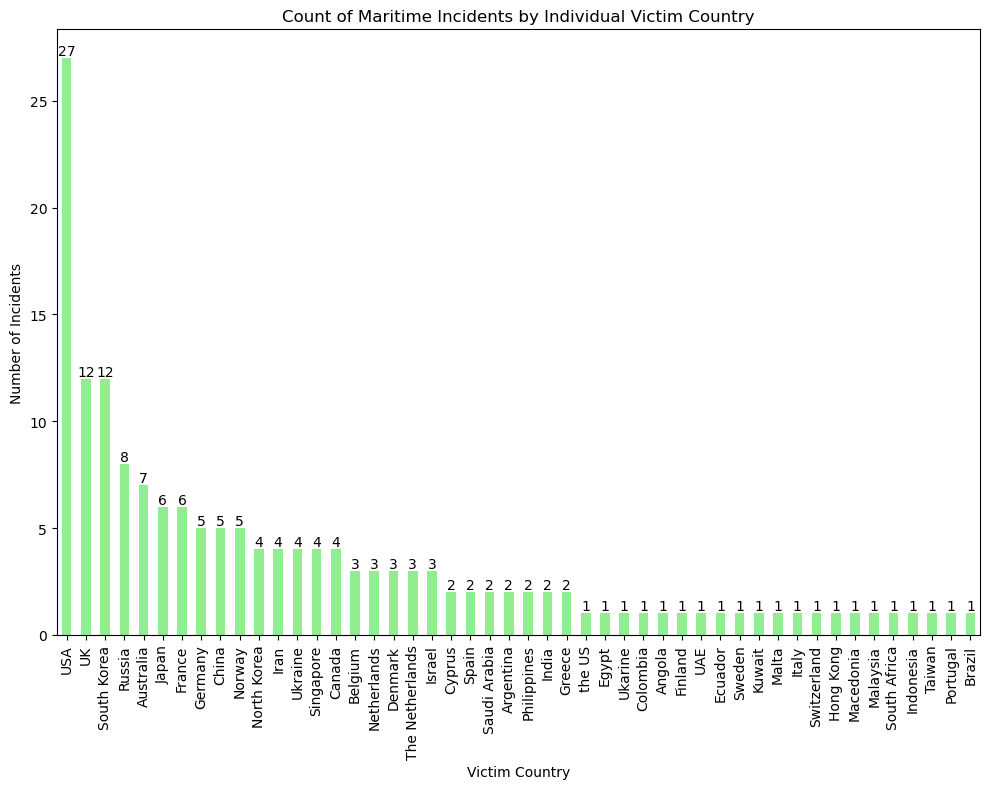

In [9]:
# Clean the 'viccountry' column 
split_ctry = df['viccountry'].dropna().apply(lambda x: [c.strip() for c in x.split(',')])

# Count the occurrences
vicctry_counts = pd.Series([ctry for sublist in split_ctry for ctry in sublist]).value_counts()
print(vicctry_counts)

# Plot the victim country counts as a bar chart
plt.figure(figsize=(10, 8))
vicctry_counts.plot(kind='bar', color='lightgreen')

plt.title('Count of Maritime Incidents by Individual Victim Country')
plt.xlabel('Victim Country')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=90, ha='center')  
plt.tight_layout() 

for index, value in enumerate(vicctry_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

/var/folders/nt/7f1y5h8s6qd2mh1ypgjkgbpw0000gn/T/ipykernel_26954/2317012014.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_numeric(df['year'], errors='coerce')


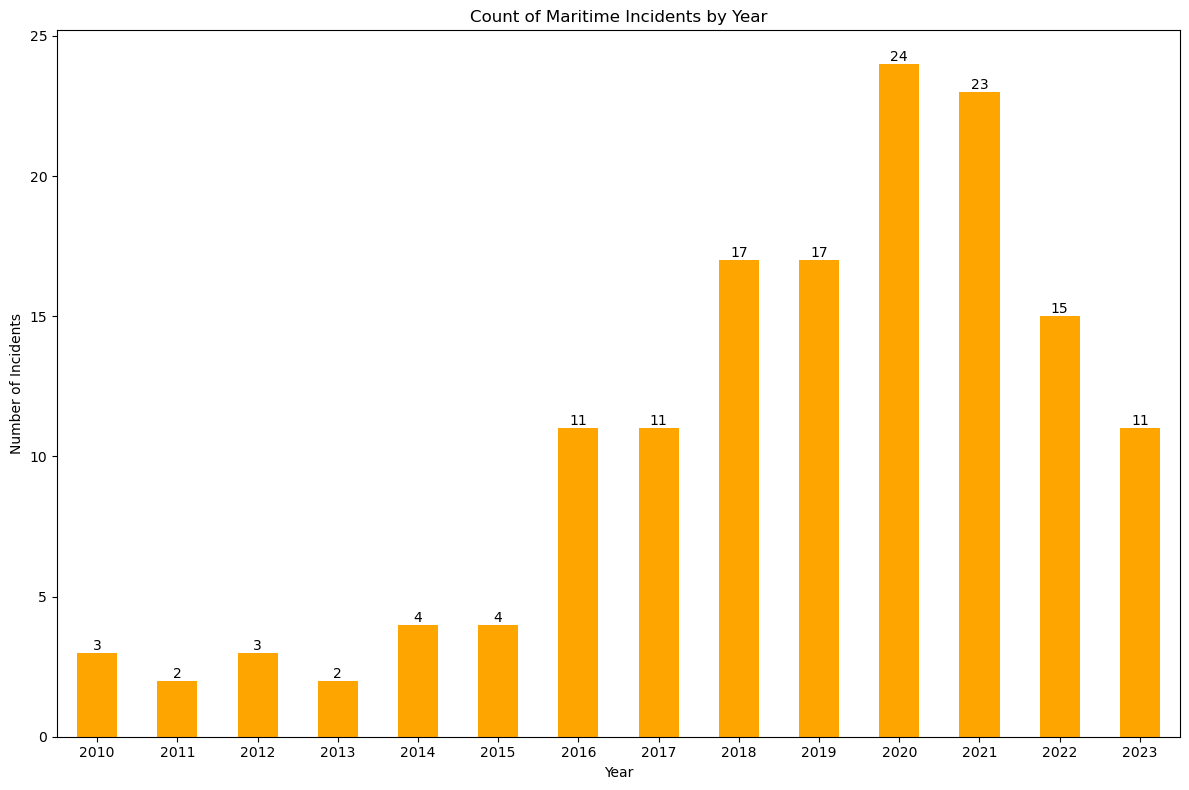

In [10]:
# Clean the 'year' column
df['year'] = pd.to_numeric(df['year'], errors='coerce') 
df_cleaned = df.dropna(subset=['year'])

# Count the occurrences
year_counts = df_cleaned['year'].value_counts().sort_index()

# Plot the year counts as a bar chart
plt.figure(figsize=(12, 8))
year_counts.plot(kind='bar', color='orange')

plt.title('Count of Maritime Incidents by Year')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=0)

for index, value in enumerate(year_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()


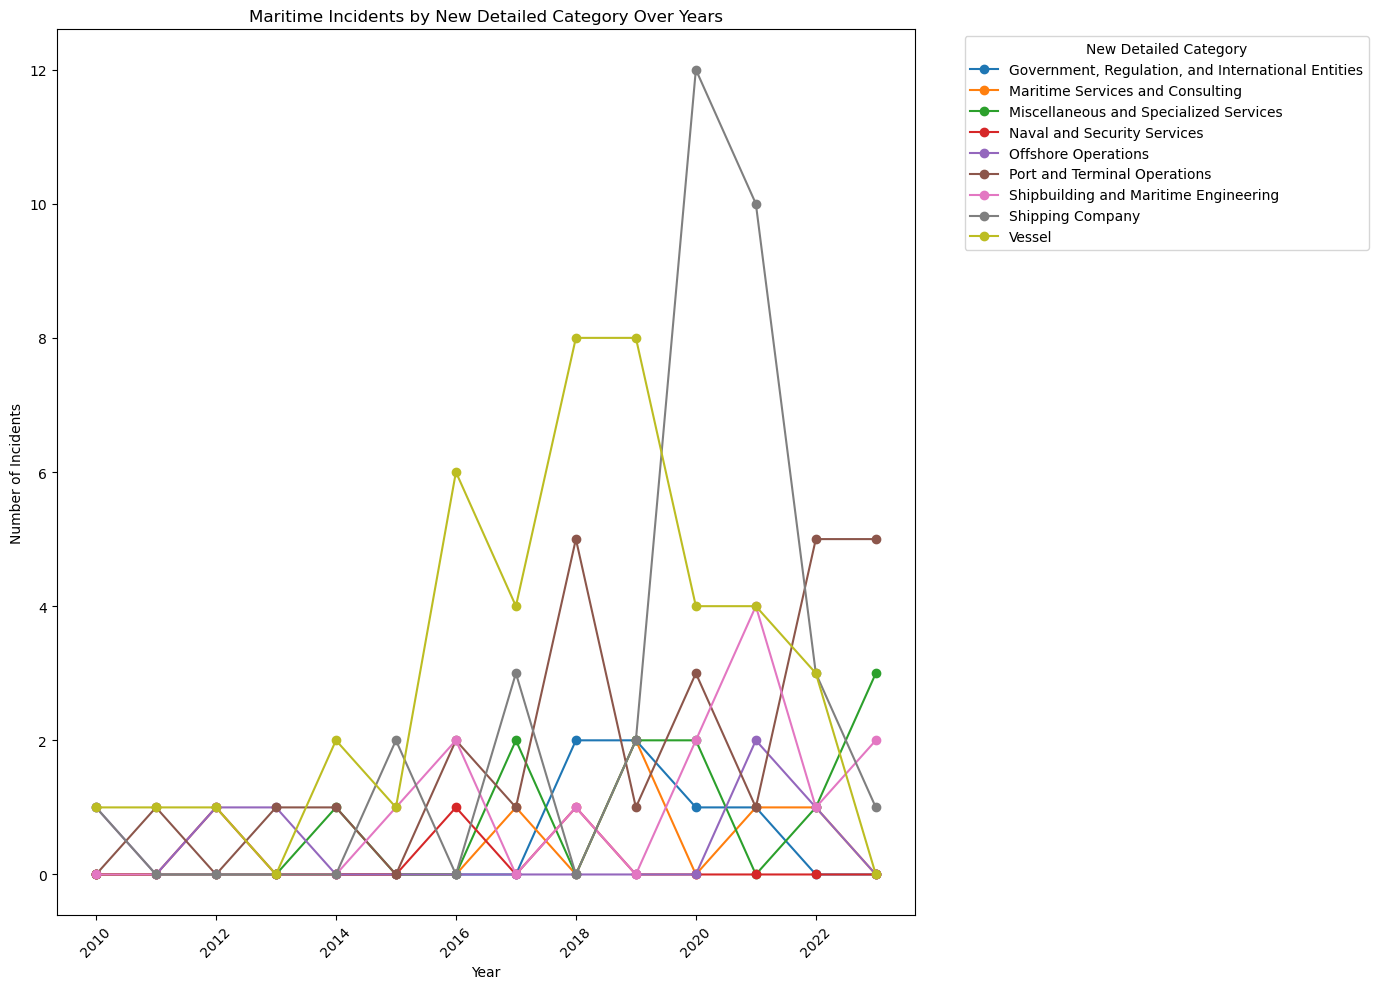

In [11]:
# Number of incidents by year for each new category
cats_year_counts = df_cleaned.groupby(['year', 'detailed_category']).size().unstack(fill_value=0)

# Plot line graphs for number of incidents by year for each new category
plt.figure(figsize=(14, 10))

for category in cats_year_counts.columns:
    plt.plot(cats_year_counts.index, cats_year_counts[category], marker='o', linestyle='-', label=category)

plt.title('Maritime Incidents by New Detailed Category Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(rotation=45)
plt.legend(title='New Detailed Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


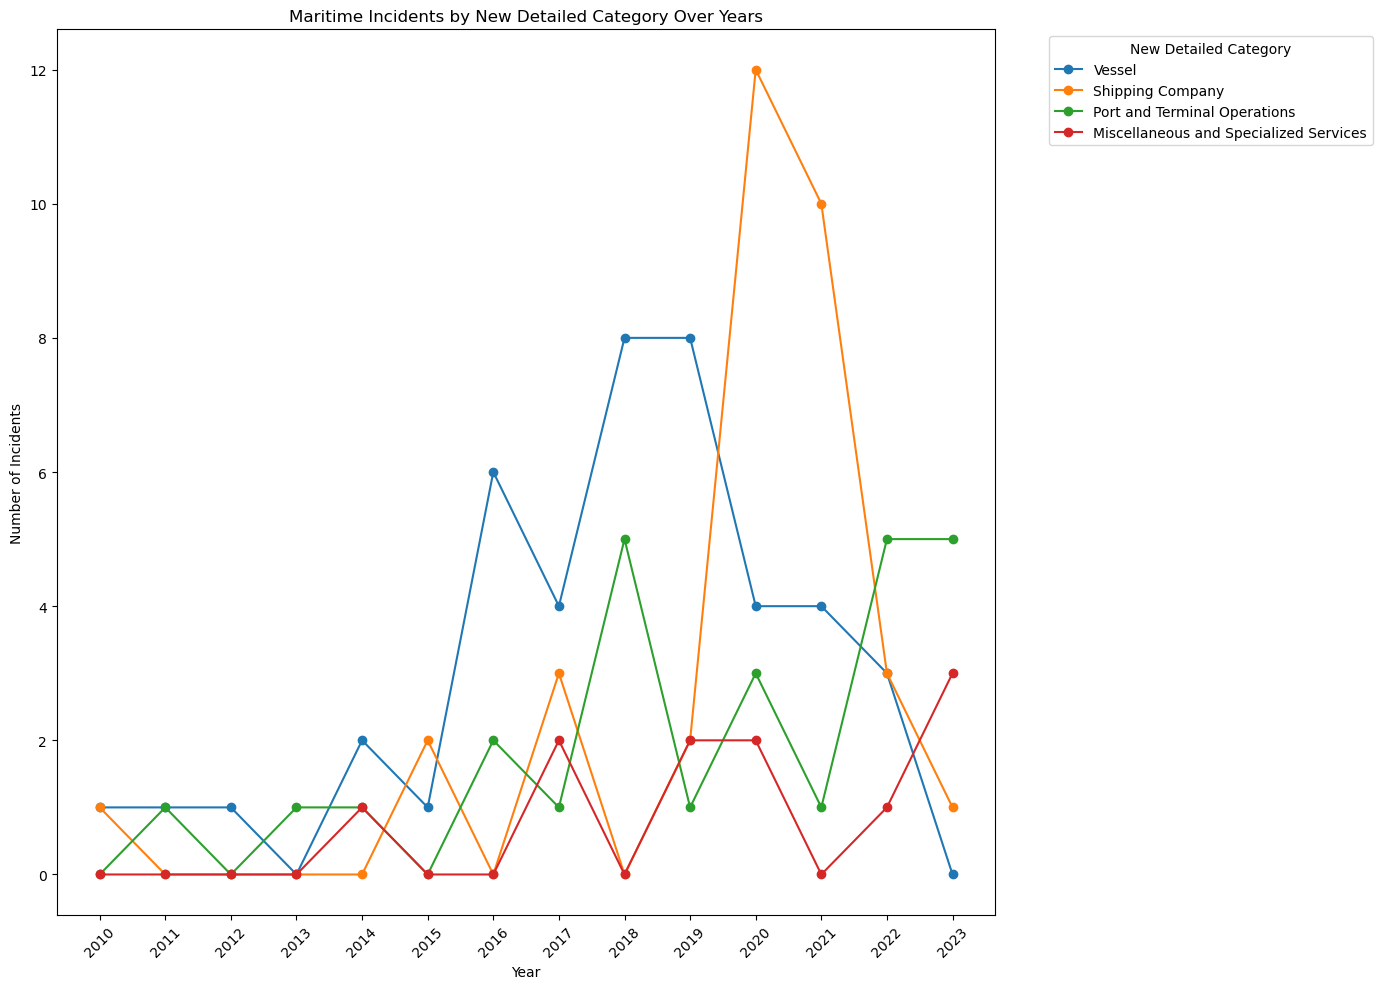

In [12]:
# Choose the top four
selected_categories = [
    'Vessel',
    'Shipping Company',
    'Port and Terminal Operations',
   # 'Shipbuilding and Maritime Engineering',
    'Miscellaneous and Specialized Services'
]

unique_years = sorted(df['year'].unique())

# Plot line graphs
plt.figure(figsize=(14, 10))

for category in selected_categories:
    plt.plot(cats_year_counts.index, cats_year_counts[category], marker='o', linestyle='-', label=category)

plt.title('Maritime Incidents by New Detailed Category Over Years')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(unique_years, [int(year) for year in unique_years], rotation=45)
plt.legend(title='New Detailed Category', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

shore                 85
vessel                39
offshore              11
shore, vessel          6
shore, offshore        4
port state control     1
offshore, vessel       1
Name: area, dtype: int64


/var/folders/nt/7f1y5h8s6qd2mh1ypgjkgbpw0000gn/T/ipykernel_26954/2335925699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area'] = df['area'].str.lower().str.strip()


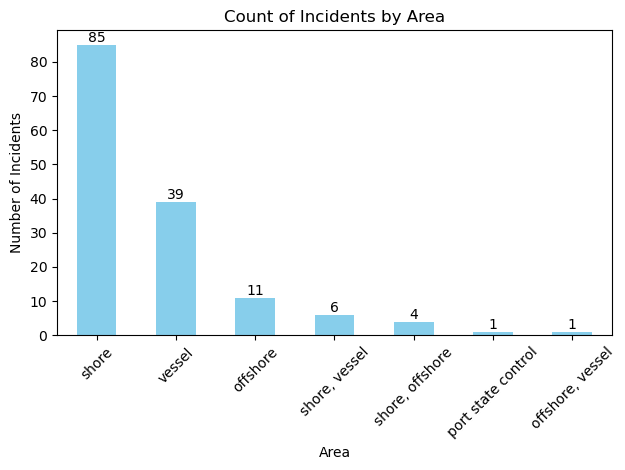

In [13]:
# Count for incidents by area
df['area'] = df['area'].str.lower().str.strip()
area_counts = df['area'].value_counts()

print(area_counts)

# Plotting the incident by area counts as a bar chart
area_counts.plot(kind='bar', color='skyblue')  

plt.title('Count of Incidents by Area')  
plt.xlabel('Area')  
plt.ylabel('Number of Incidents')  
plt.xticks(rotation=45) 

for index, value in enumerate(area_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [14]:
# Category 'area' into 'Shore' and 'Offshore'
def area_cats_1(area_str):
    area_str = area_str.lower().strip()  
    if 'offshore' in area_str or 'vessel' in area_str:
        return 'Offshore'
    elif 'shore' in area_str:
        return 'Shore'
    elif 'port state control' in area_str:
        return 'Shore'
    else:
        return 'Other'

df['area_category_1'] = df['area'].apply(area_cats_1)

# Count
detailed_area_counts = df['area_category_1'].value_counts()
detailed_area_counts


/var/folders/nt/7f1y5h8s6qd2mh1ypgjkgbpw0000gn/T/ipykernel_26954/3000578687.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_category_1'] = df['area'].apply(area_cats_1)


Shore       86
Offshore    61
Name: area_category_1, dtype: int64

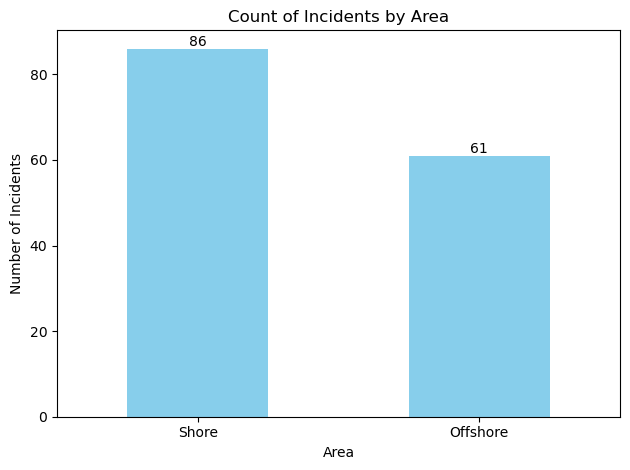

In [15]:
# Plot the bar chart for count incident happend in 'Shore' and 'Offshore'
detailed_area_counts.plot(kind='bar', color='skyblue')  

plt.title('Count of Incidents by Area')  
plt.xlabel('Area')  
plt.ylabel('Number of Incidents')  
plt.xticks(rotation=0)

for index, value in enumerate(detailed_area_counts):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [16]:
# Category 'area' into 'Shore', 'Offshore' and 'Shore, Offshore'
def area_cats_2(area_str):
    area_str = area_str.lower().strip()
    if re.search(r'\boffshore\b', area_str) and re.search(r'\bvessel\b', area_str):
        return 'Offshore'
    elif re.search(r'\bshore\b', area_str) and (re.search(r'\boffshore\b', area_str) or re.search(r'\bvessel\b', area_str)):
        return 'Shore, Offshore'
    elif re.search(r'\boffshore\b', area_str) or re.search(r'\bvessel\b', area_str):
        return 'Offshore'
    elif re.search(r'\bshore\b', area_str):
        return 'Shore'
    elif 'port state control' in area_str:
        return 'Shore'
    else:
        return 'Other'

df['area_category_2'] = df['area'].apply(area_cats_2)

classified_area_counts = df['area_category_2'].value_counts()
classified_area_counts


/var/folders/nt/7f1y5h8s6qd2mh1ypgjkgbpw0000gn/T/ipykernel_26954/2593178123.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['area_category_2'] = df['area'].apply(area_cats_2)


Shore              86
Offshore           51
Shore, Offshore    10
Name: area_category_2, dtype: int64

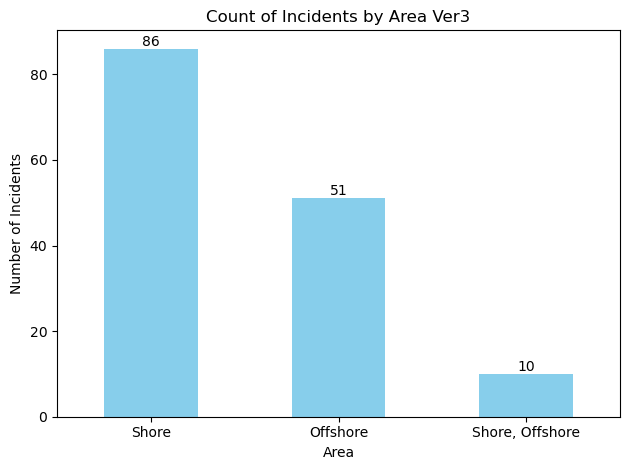

In [17]:
# Plot the incidents by area in 'Shore', 'Offshore' and 'Shore, Offshore'
area_counts3 = df['area_category_2'].value_counts()

area_counts3.plot(kind='bar', color='skyblue')  

plt.title('Count of Incidents by Area Ver3')  
plt.xlabel('Area')  
plt.ylabel('Number of Incidents')  
plt.xticks(rotation=0)

for index, value in enumerate(area_counts3):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [18]:
# Count incidents are related to AIS and GPS
gps_incidents = df[df['title'].str.contains('GPS', case=False, na=False)]
ais_incidents = df[df['title'].str.contains('AIS', case=False, na=False)]

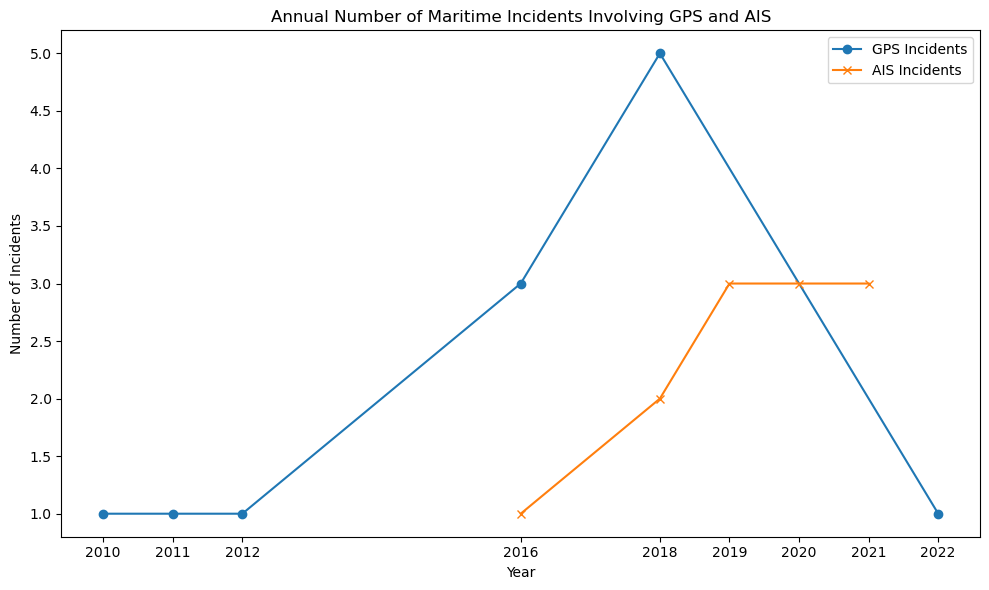

In [19]:
# Plotting the line chart for incidents are related to AIS and GPS
gps_counts = gps_incidents.groupby('year').size()
ais_counts = ais_incidents.groupby('year').size()

gps_ais_years = sorted(set(gps_counts.index).union(set(ais_counts.index)))

plt.figure(figsize=(10, 6))
plt.plot(gps_counts.index, gps_counts.values, marker='o', label='GPS Incidents')
plt.plot(ais_counts.index, ais_counts.values, marker='x', label='AIS Incidents')

plt.title('Annual Number of Maritime Incidents Involving GPS and AIS')
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.xticks(gps_ais_years, [int(year) for year in gps_ais_years])
plt.legend()
plt.tight_layout() 

plt.show()